# EXERCISE: Intro to classes: object oriented Python

Everything in Python is an object: variables, raw types, functions, everything.

Sometimes it's useful to organize code around data — to think of a type of data as owning its own functions and metadata. In essence, we store data along with relevant functions (methods) in one 'thing' — an object. You can also think of this as writing your own 'types'.

You can also build very complicated code this way, so be careful! Don't dive into writing classes until you've used Python for a while and start to see how most people use objects in Python. 

This notebook builds on the workflow in [Intro to PYthon](Intro_to_Python.ipynb), so you shoudl be sure to look at that notebook first.

## Types

Python has several types, many of which you're already familiar with.

In [7]:
import numpy as np

In [2]:
type(5)

int

In [3]:
type('fifteen'), type('15')

(str, str)

'fifteen' is an **instance** of the class **str**.

Most of these objects have methods, which are just functions that 'belong' to the class:

In [4]:
'fifteen'.find('t')  # Call the method `find` on the string

3

In [5]:
lst = [1,3,4,5,7,8]
lst.append(1000)
lst

[1, 3, 4, 5, 7, 8, 1000]

## A simple class

In [6]:
layers = [0.23, 0.34, 0.45, 0.25, 0.23, 0.35]

Start with only one special method: `__init__()` which is required anyway.

Inside `__init__()` we'll only define one **attribute**, `self.layers`.

In [8]:
class Layers(object):  # The 'new' Python base class — gives us some useful basic features.
    
    def __init__(self, layers):  # All methods take `self`, which is 'this' instance

        # Just make sure we end up with an array
        self.layers = np.array(layers)
        
        # __init__ can not return anything, and most people don't include a `return` line.

Now we can **instantiate** an instance of the class **Layers**

In [9]:
l = Layers(layers)

In [10]:
l

In [11]:
l.layers

array([ 0.23,  0.34,  0.45,  0.25,  0.23,  0.35])

At this point, we might as well just have an array, like we had before. So let's add another attribute, let's give the object a 'name':

In [15]:
def sum(a, b=1):
    return a + b

sum(5)

TypeError: sum() missing 1 required positional argument: 'b'

In [24]:
class Layers(object):
    
    def __init__(self, layers, label=None):  # We use a default value of None

        self.layers = np.array(layers)
        self.label = label or "My log"  # This trick substitutes anything evaluating as False with 'My log'

In [25]:
l = Layers(layers)

In [26]:
l.label

'My log'

## Magic methods

Let's find out how big our fancy `Layers` object is...

In [29]:
len(l)

TypeError: object of type 'Layers' has no len()

Dammit!

The class inherited from `object` when we defined it, and it doesn't know how to apply `len` to our thing. We could do this...

In [30]:
len(l.layers)

6

But sometimes we'd like something to 'just work' — maybe later we're going to pass our instances to something that can take lists or our new objects, and that thing might call `len()` on our object. 

That's why this also doesn't help:

In [32]:
class Layers(object):
    def __init__(self, layers, label=None):
        self.layers = np.array(layers)
        self.label = label or "My log"
        self.length = self.layers.size

What's more, storing length in an attribute like this is unexpected...

So we tell it with a so-called 'dunder' (double-underscore) or ['magic' method](https://docs.python.org/3/reference/datamodel.html) (not to be confused with IPython magics). That way, we can give our object the same interface as typical Python objects.

In [36]:
class Layers(object):
    def __init__(self, layers, label=None): 
        self.layers = np.array(layers)
        self.label = label or "My log"

    def __len__(self):
        return len(self.layers)

In [37]:
l = Layers(layers, label='Well 1')
len(l)

6

In [39]:
len(6)

TypeError: object of type 'int' has no len()

Another useful magic method is `__repr__()`. Right now all we see when we do `l` on its own is:

In [42]:
l

In [54]:
class Layers(object):
    def __init__(self, layers, label=None): 
        self.layers = np.array(layers)
        self.label = label or "My log"

    def __len__(self):
        return len(self.layers)
    
    def __repr__(self):
        return 'Layers(length={})'.format(len(self))
    
    def __str__(self):
        s = 'Layers([{}...{}])'
        return s.format(self.layers[:3], self.layers[-3:])

In [56]:
l = Layers(layers, label='Well 1')
l

Layers(length=6)

In [57]:
print(l)

Layers([[ 0.23  0.34  0.45]...[ 0.25  0.23  0.35]])


A similar method `__str__()` defines what happens if we cast the object to a `str` type — which is also what happens to it if we call `print()` on it.

### Ex: Try writing a __str__ method

A handy extra magic method in Jupyter notebook is `_repr_html_()` which tells the notebook what to use for `repr()` — it overrides `__repr__()` when you're in the notebook.

In [58]:
class Layers(object):
    def __init__(self, layers, label=None):
        self.layers = np.array(layers)
        self.label = label or "My log"
        self.length = self.layers.size
        
    def __len__(self):
        return len(self.layers)

    def __repr__(self):
        return 'Layers(length={})'.format(len(self))
    
    def _repr_html_(self):
        rows = "<tr><th>{}</th></tr>".format(self.label)
        rows += "<tr><td>"
        layer_strs = [str(i) for i in self.layers]
        rows += "</td></tr><tr><td>".join(layer_strs)
        rows += "</td></tr>"
        html = "<table>{}</table>".format(rows)
        return html

In [61]:
l = Layers(layers, label='Well 1')
l

Well 1
0.23
0.34
0.45
0.25
0.23
0.35


## Ex: Try writing a method that allows you to do layers1 + layers2

In [83]:
np.vstack([[1,2,3], [4,5,6]])

array([[1, 2, 3],
       [4, 5, 6]])

In [87]:
np.append(Layers, np.array([4,5,6]))

array([<class '__main__.Layers'>, 4, 5, 6], dtype=object)

In [91]:
class Layers(object):
    def __init__(self, layers, label=None):
        self.layers = np.array(layers)
        self.label = label or "My log"
        self.length = self.layers.size
        
    def __len__(self):
        return len(self.layers)

    def __repr__(self):
        return 'Layers(length={})'.format(len(self))
    
    def _repr_html_(self):
        rows = "<tr><th>{}</th></tr>".format(self.label)
        rows += "<tr><td>"
        layer_strs = [str(i) for i in self.layers]
        rows += "</td></tr><tr><td>".join(layer_strs)
        rows += "</td></tr>"
        html = "<table>{}</table>".format(rows)
        return html
    
    
    def __add__(self, other):
        
        all_layers = np.append(self.layers, other.layers)
        
        return Layers(all_layers, self.label)

In [92]:
l = Layers([1,2,3], "My awesome well")
m = Layers([4,5,6,7], "My other awesome well")

l + m

My awesome well
1
2
3
4
5
6
7


In [93]:
l.__dict__

{'label': 'My awesome well', 'layers': array([1, 2, 3]), 'length': 3}

## Constructor methods

It can be handy to have several ways to instantiate a class, rather than knowing you'll pass a list (say). 

Let's make a CSV file and write a special method to read those. Even though this is only a 1D dataset, I'll make it more interesting — and more like what you'll normally encounter — by assuming we're reading lots of rows from the CSV.

In [94]:
import csv

with open('../data/my_layers.csv', 'w') as f:
    writer = csv.writer(f)
    for row in layers:
        writer.writerow([row])  # Have to form a list b/c it's just a 1D array.

In [95]:
!more ../data/my_layers.csv

0.23
0.34
0.45
0.25
0.23
0.35


In [127]:
import matplotlib.pyplot as plt
%matplotlib inline

class Layers(object):
    def __init__(self, layers, label=None):
        self.layers = np.array(layers)
        self.label = label or "My log"
        self.length = self.layers.size
        
    def __len__(self):
        return len(self.layers)

    def __repr__(self):
        return 'Layers(length={})'.format(len(self))
    
    def _repr_html_(self):
        rows = "<tr><th>{}</th></tr>".format(self.label)
        rows += "<tr><td>"
        layer_strs = [str(i) for i in self.layers]
        rows += "</td></tr><tr><td>".join(layer_strs)
        rows += "</td></tr>"
        html = "<table>{}</table>".format(rows)
        return html
    
    # This decorator indicates to Python that this method handles classes not instances.
    @classmethod
    def from_csv(cls, filename, column=0):  # Takes cls not self.
        layer_list = []
        with open(filename, 'r') as f:
            reader = csv.reader(f)
            for row in reader:
                layer_list.append(float(row[column]))
        return cls(layer_list)  # Returns an instance of the class.
    
    def compute_rc(self):
        """
        This computes the reflection coefficients of the layers.
        """
        upper = self.layers[:-1]
        lower = self.layers[1:]
        
        rcs = (lower - upper) / (lower + upper)

        return rcs

    def plot(self):
        fig = plt.figure(figsize=(4,12))
        ax = fig.add_subplot(111)
        z = np.arange(len(self.layers))
        ax.barh(z, self.layers)
        plt.show()

In [128]:
l = Layers.from_csv('../data/my_layers.csv', column=0)
l

My log
0.23
0.34
0.45
0.25
0.23
0.35


In [129]:
l.compute_rc()

array([ 0.19298246,  0.13924051, -0.28571429, -0.04166667,  0.20689655])

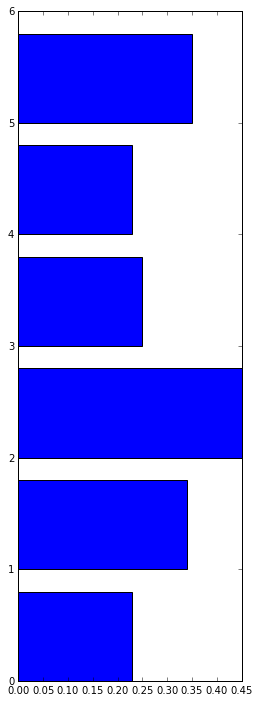

In [130]:
l.plot()

### Ex: Can you write a method to compute reflection coefficients for these layers?

### Ex: Can you write a method to plot the Layers instance?

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>